In [1]:
import sys
import os
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

from utils import ProgressBar

In [2]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [3]:
def generate_dataset():
    x = np.linspace(1,1000,100000)
    y = np.sin(x/80)+np.random.normal(0,10/255,x.shape)
    x.shape = (100000,1)
    y.shape = (100000,1)
    return np.asarray(x,np.float32),np.asarray(y,np.float32)

In [4]:
x,y = generate_dataset()
print(x.shape,y.shape)
print(x[0])

(100000, 1) (100000, 1)
[ 1.]


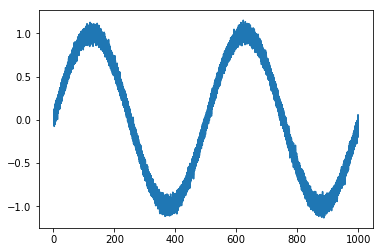

In [5]:
plt.plot(x,y)

In [6]:
import torch.utils.data as udata

class Dataset(udata.Dataset):
    def __init__(self,input_dataset,output_dataset):
        super(Dataset, self).__init__()
        self.inpt = input_dataset
        self.output = output_dataset
        
    def __len__(self):
        return len(self.inpt)
    
    def __getitem__(self,index):
        inpt = self.inpt[index]
        output = self.output[index]
#         inpt.shape = (1)
#         output.shape = (1)
        sample = {'inpt': inpt, 'output': output}
        return sample

In [7]:
train_dataset = Dataset(x,y)

In [8]:
print(len(train_dataset))

100000


In [9]:
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset=train_dataset, num_workers=6, batch_size=128, shuffle=True)

In [10]:
print(len(train_loader))
for i, data in enumerate(train_loader):
    print(i,data['inpt'].shape,data['output'].shape)
    break

782
0 torch.Size([128, 1]) torch.Size([128, 1])


In [11]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        layers = []
        layers.append(nn.Linear(in_features=1, out_features=100, bias=True))
        layers.append(nn.ReLU(inplace=True))
#         layers.append(nn.Tanh())
        layers.append(nn.Linear(in_features=100, out_features=100, bias=True))
#         layers.append(nn.Tanh())
        layers.append(nn.ReLU(inplace=True))
        layers.append(nn.Linear(in_features=100, out_features=100, bias=True))
#         layers.append(nn.Tanh())
        layers.append(nn.ReLU(inplace=True))
        layers.append(nn.Linear(in_features=100, out_features=1, bias=True))
        self.net = nn.Sequential(*layers)
    def forward(self,x):
        return self.net(x)

In [16]:
lr = 1e-3
criterion = nn.MSELoss(size_average=False)
model = MLP()

model = model.cuda()
criterion = criterion.cuda()
optimizer = optim.Adam(model.parameters(), lr)

In [17]:
def model_train(model,train_loader,optimizer):
    progress_bar = ProgressBar(len(train_loader))
    for i, data in enumerate(train_loader, 0):
        # Pre-training step
        model.train()
        model.zero_grad()
        optimizer.zero_grad()

        # inputs: noise and noisy image
        imgn_train = data['inpt'].cuda()
        img_train = data['output'].cuda()

        # Evaluate model and optimize it
        out_train = model(imgn_train)
        loss = criterion(out_train, img_train) / (imgn_train.size()[0]*2)
        loss.backward()
        optimizer.step()
        
        # Results
        progress_bar.update(i,loss.data.cpu().numpy())

[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.253632


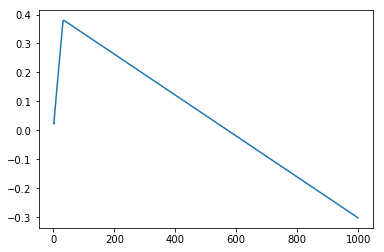

0
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.354087


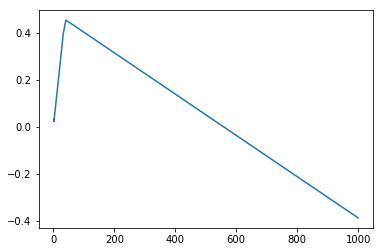

1
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.150480


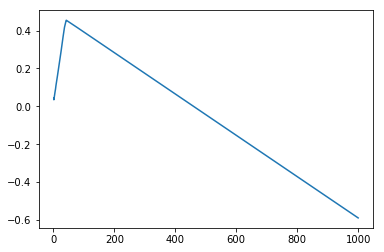

2
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.273772


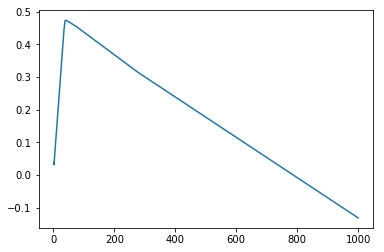

3
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.234394


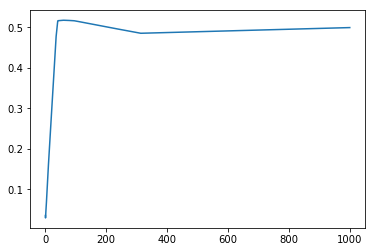

4
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.195513


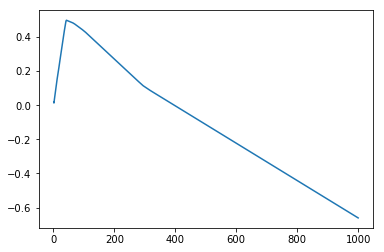

5
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.208971


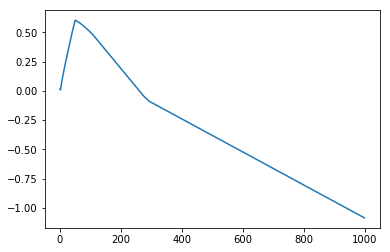

6
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.148448


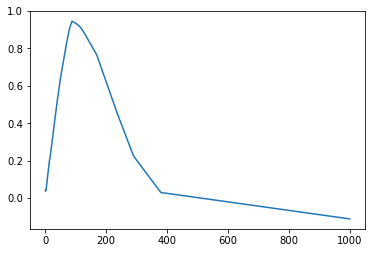

7
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.244208


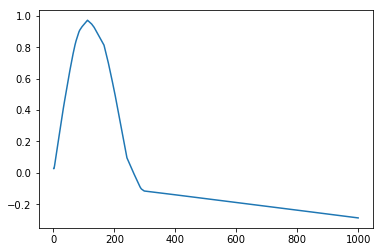

8
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.209424


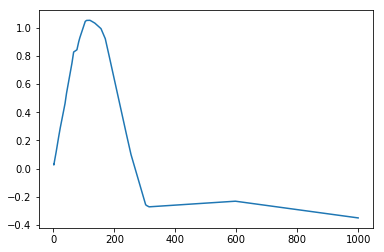

9
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.181573


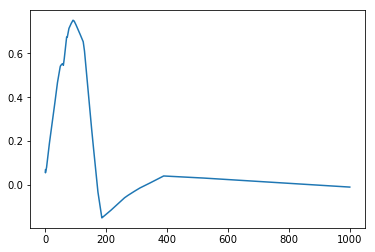

10
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.143774


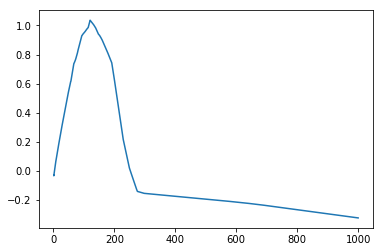

11
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.081092


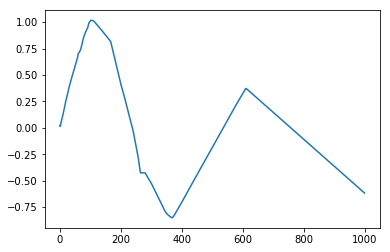

12
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.076420


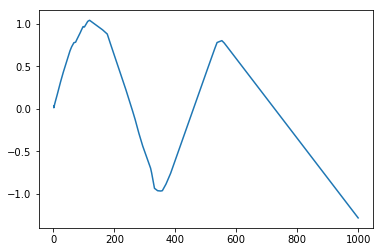

13
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.026904


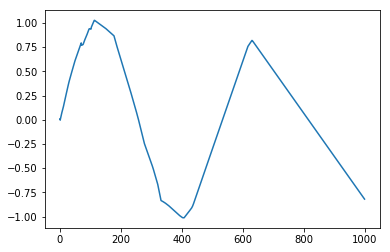

14
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.039372


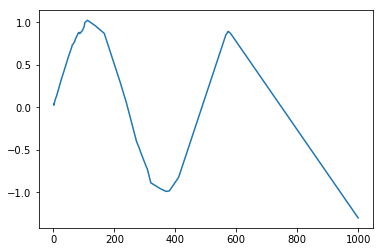

15
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.045598


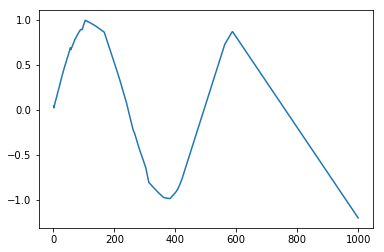

16
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.055201


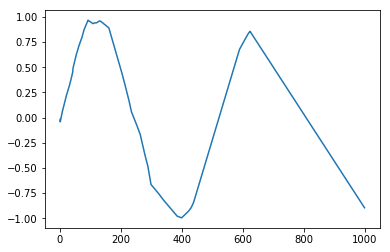

17
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.034891


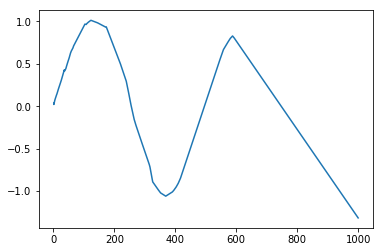

18
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.028018


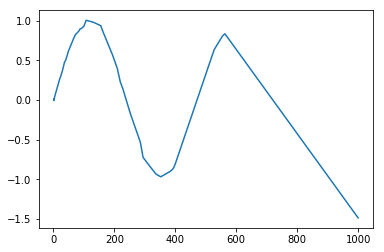

19
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.038973


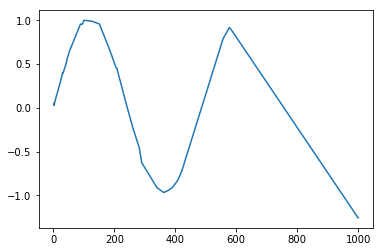

20
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.049257


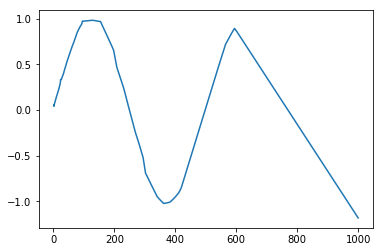

21
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.044212


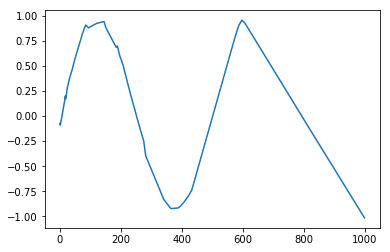

22
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.051993


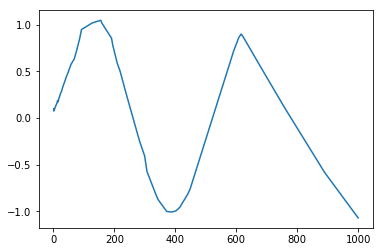

23
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.026333


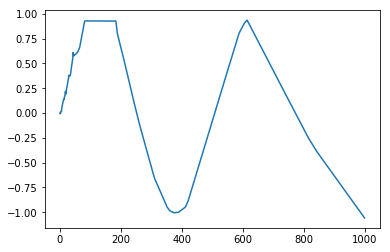

24
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.020416


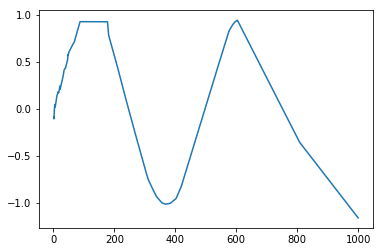

25
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.033486


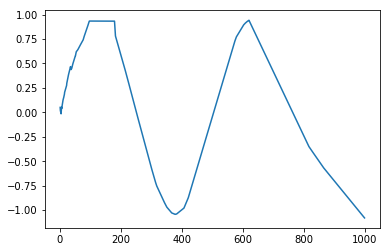

26
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.061241


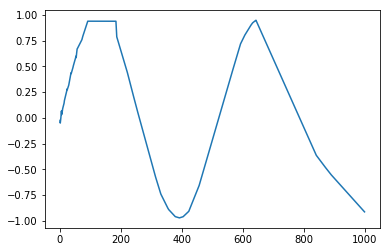

27
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.027573


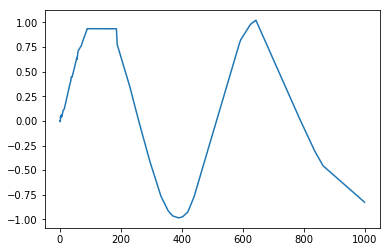

28
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.034338


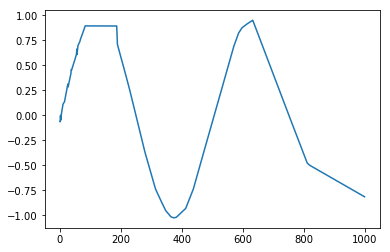

29
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.006294


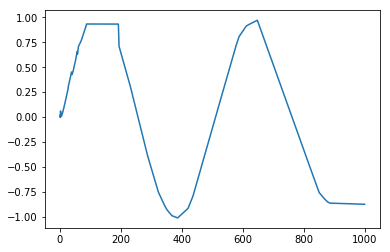

30
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.006253


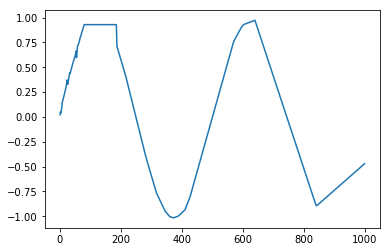

31
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.002226


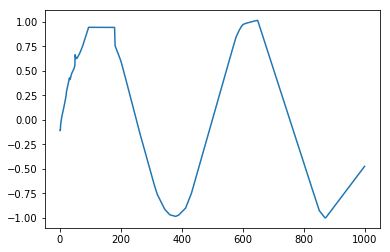

32
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.002094


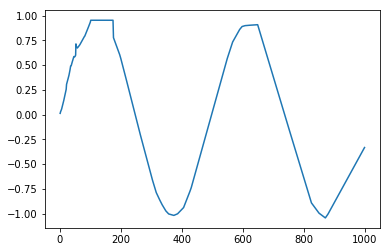

33
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.002924


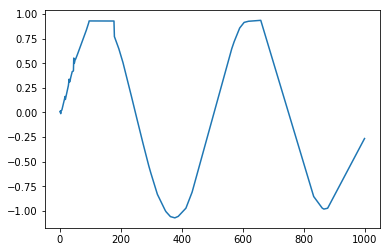

34
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.002139


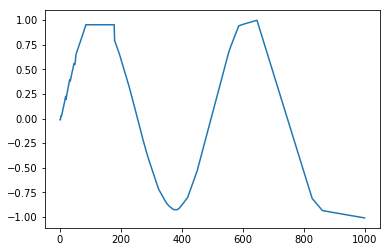

35
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.008224


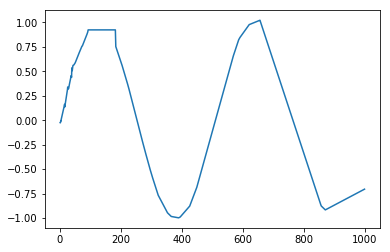

36
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.004816


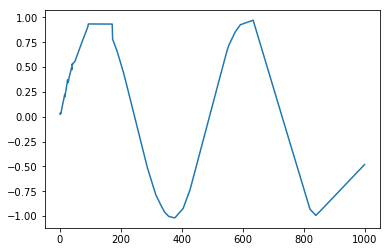

37
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.001403


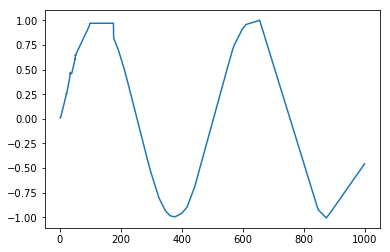

38
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.002809


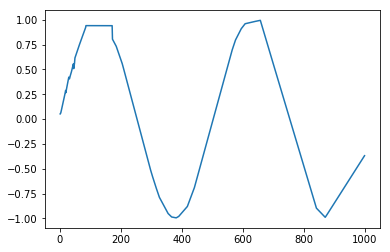

39
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.177425


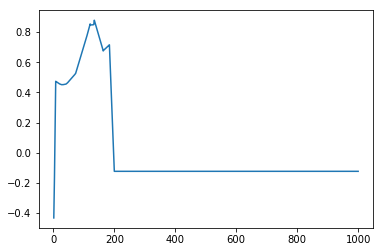

40
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.173116


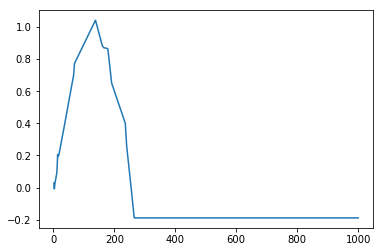

41
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.091496


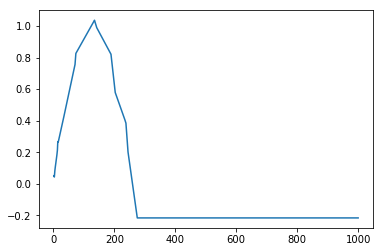

42
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.136360


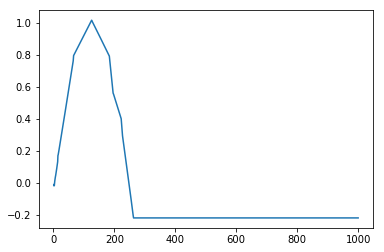

43
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.139176


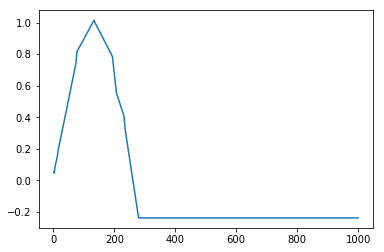

44
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.158959


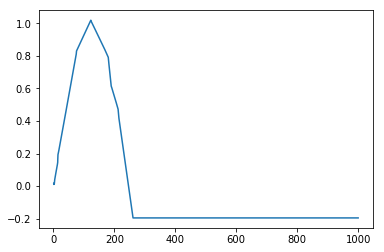

45
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.176079


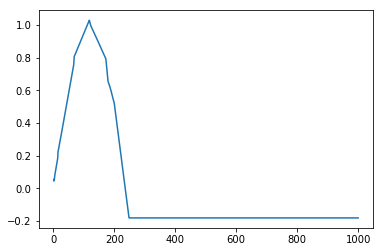

46
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.149971


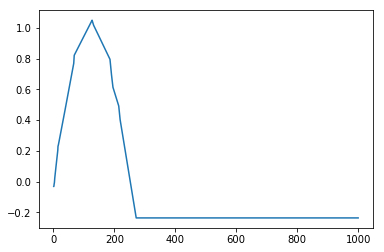

47
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.151854


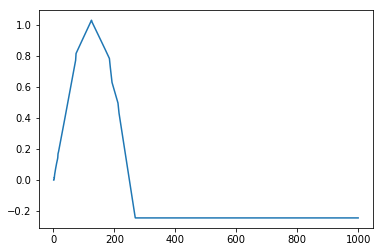

48
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.167433


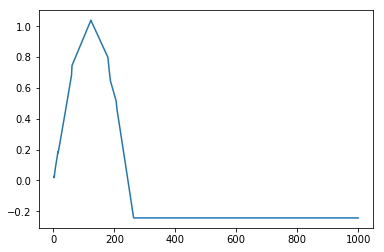

49
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.108046


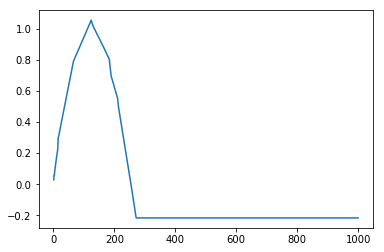

50
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.183469


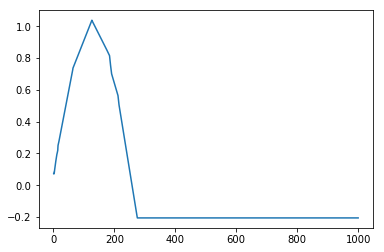

51
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.176903


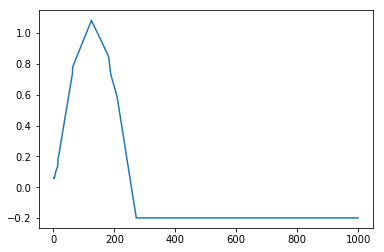

52
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.197806


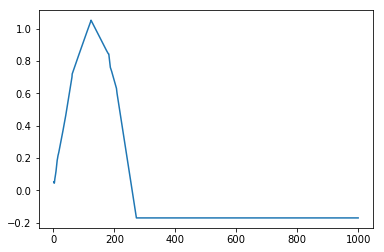

53
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.196762


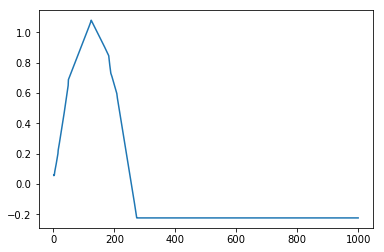

54
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.150805


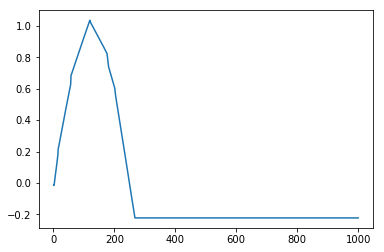

55
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.204647


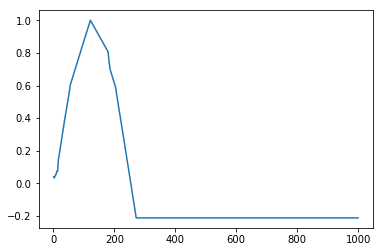

56
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.175886


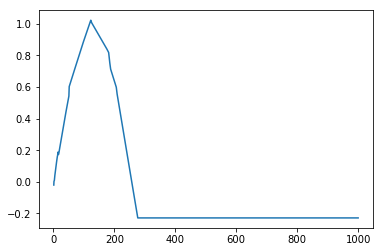

57
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.149430


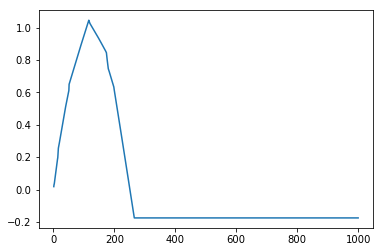

58
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.157569


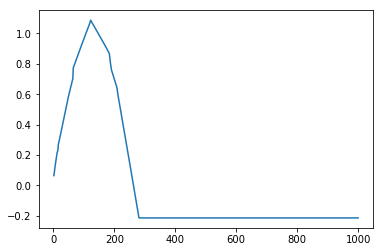

59
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.248590


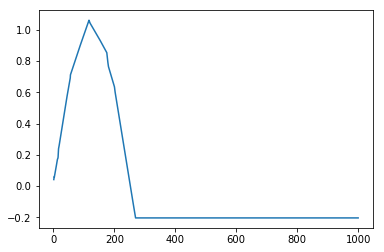

60
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.134049


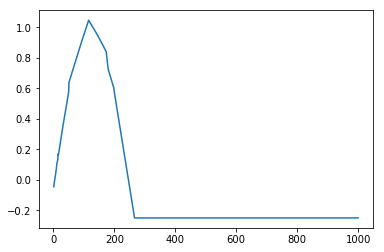

61
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.191888


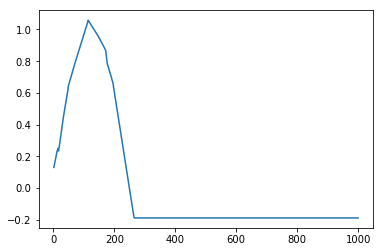

62
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.214296


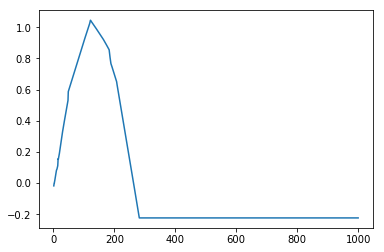

63
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.190419


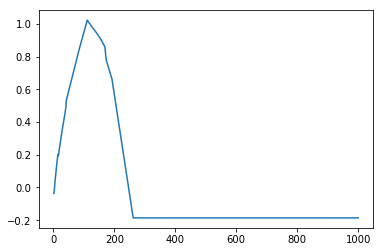

64
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.159500


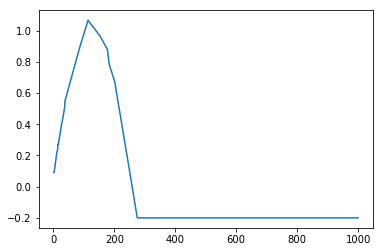

65
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.195047


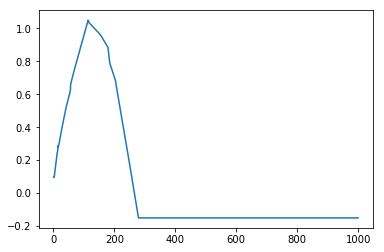

66
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.193114


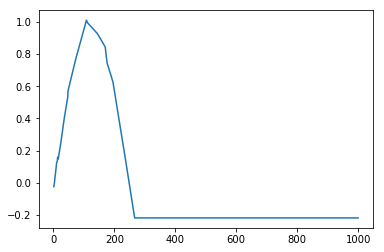

67
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.128416


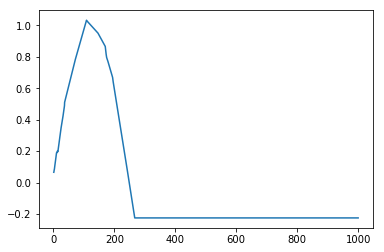

68
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.209340


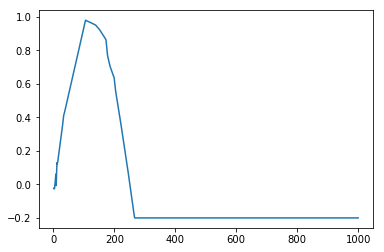

69
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.187887


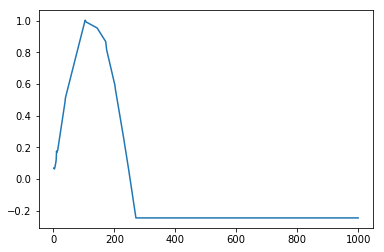

70
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.174571


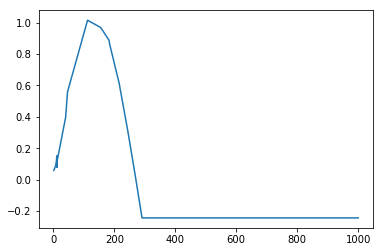

71
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.231148


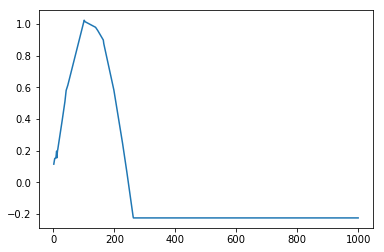

72
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.178360


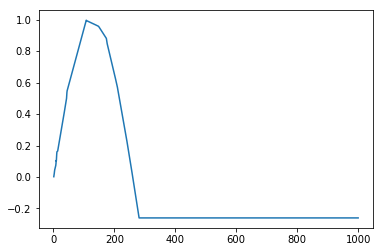

73
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.126516


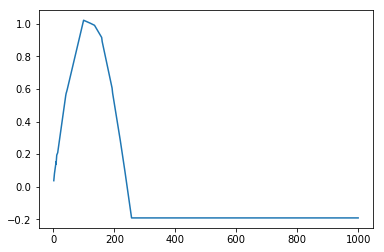

74
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.176945


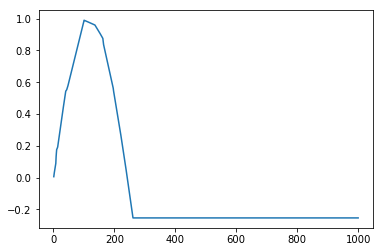

75
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.166501


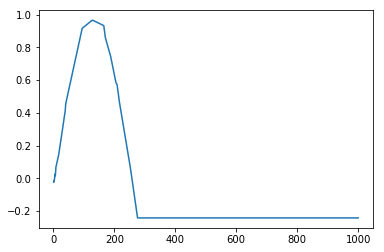

76
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.147477


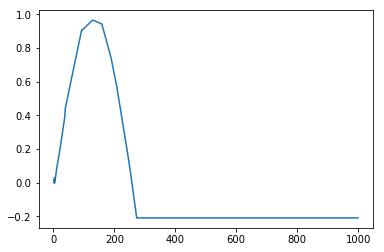

77
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.176609


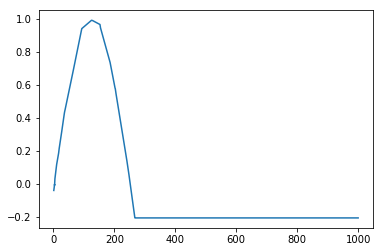

78
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.139964


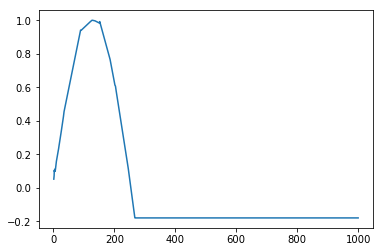

79
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.204293


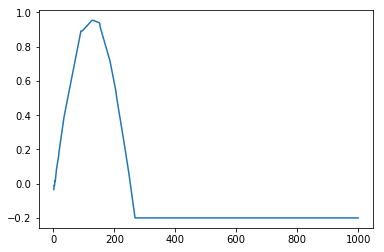

80
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.178105


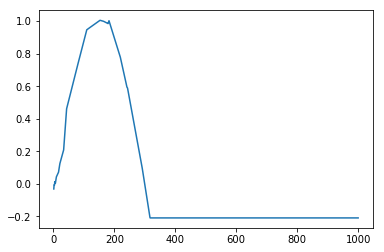

81
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.181504


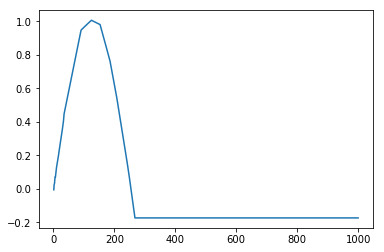

82
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.240577


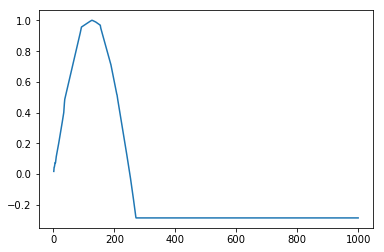

83
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.214993


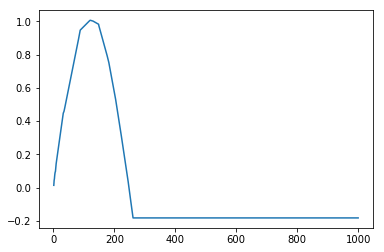

84
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.207565


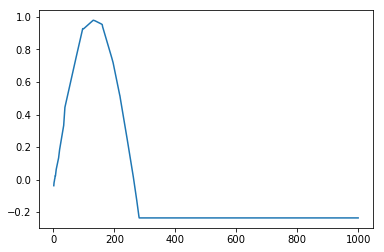

85
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.164193


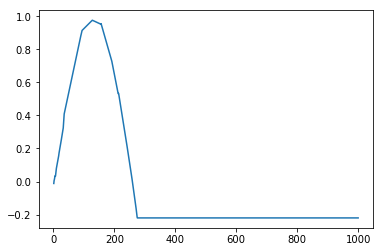

86
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.180035


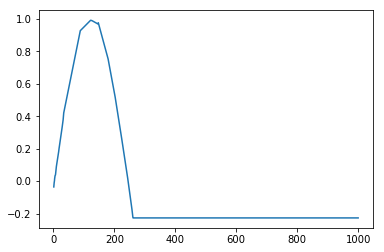

87
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.160962


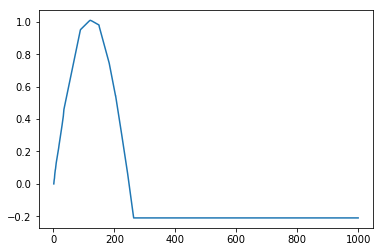

88
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.268429


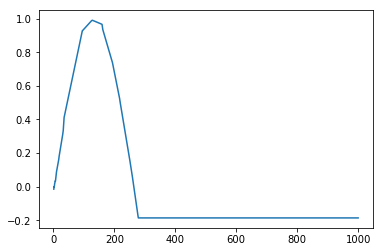

89
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.171134


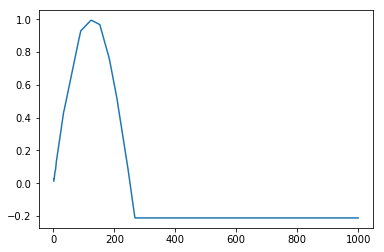

90
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.195146


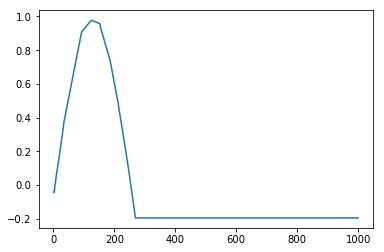

91
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.179430


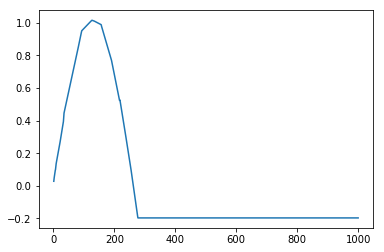

92
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.133322


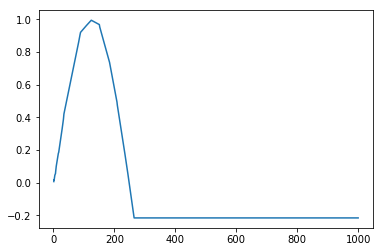

93
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.179566


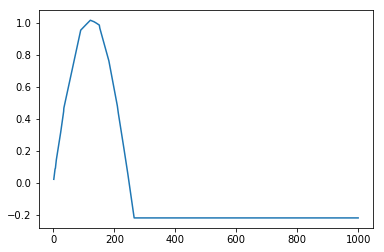

94
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.199244


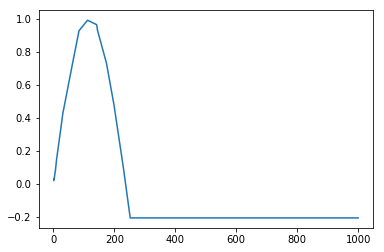

95
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.144472


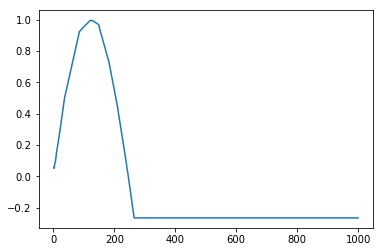

96
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.129339


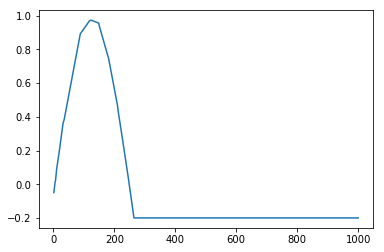

97
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.152484


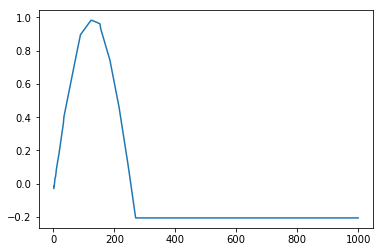

98
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.116895


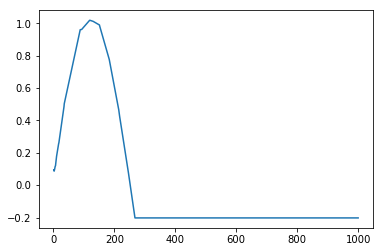

99
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.237398


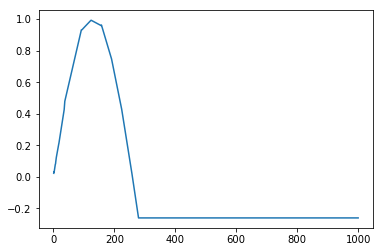

100
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.109408


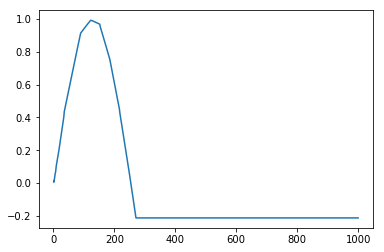

101
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.171535


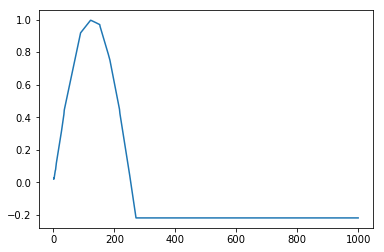

102
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.157455


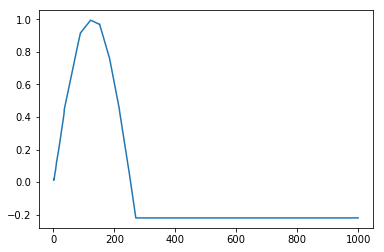

103
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.154623


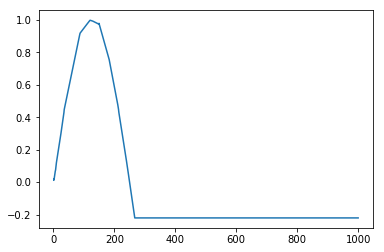

104
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.211394


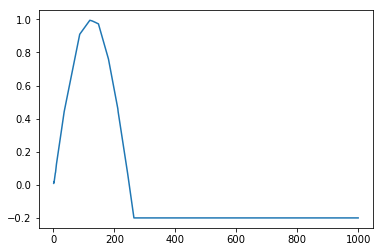

105
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.144943


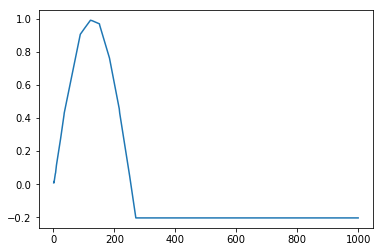

106
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.165602


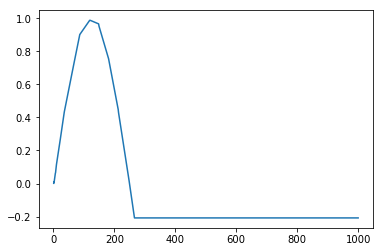

107
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.192722


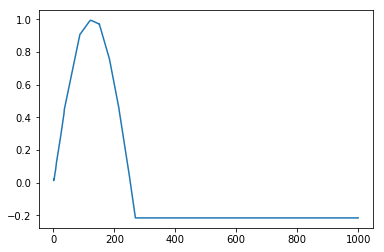

108
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.135180


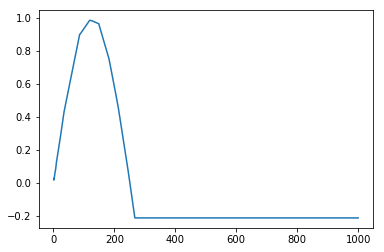

109
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.194161


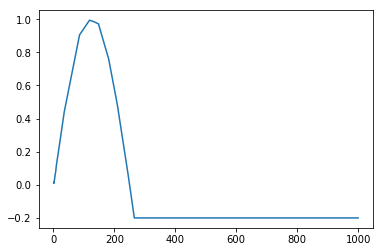

110
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.205604


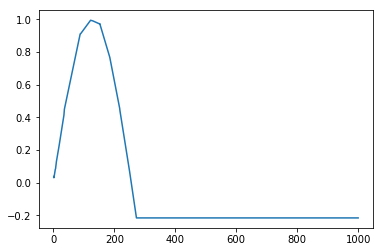

111
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.183430


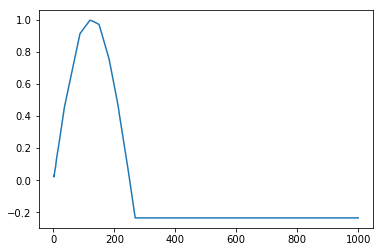

112
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.142872


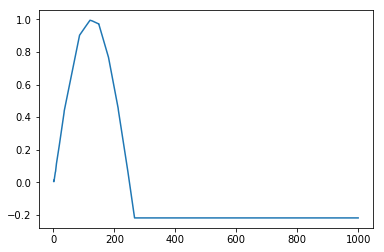

113
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.170753


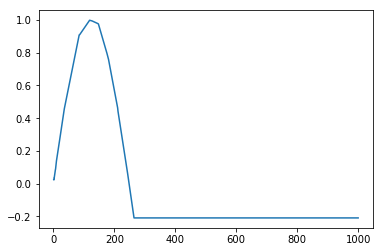

114
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.223595


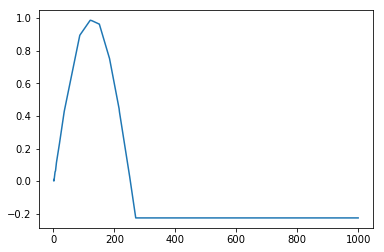

115
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.177996


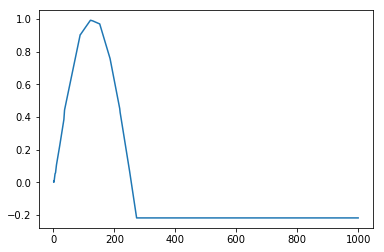

116
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.199381


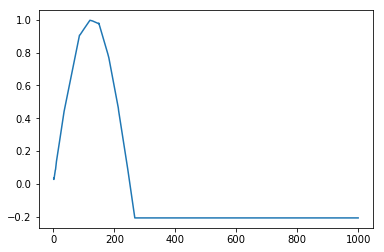

117
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.143043


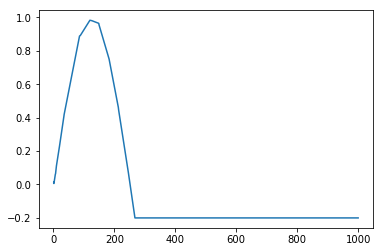

118
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.170380


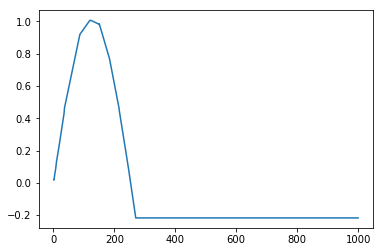

119
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.126371


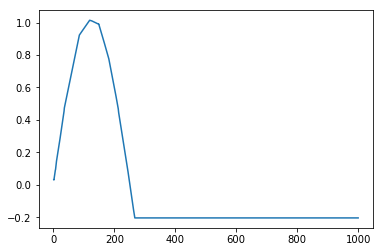

120
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.291932


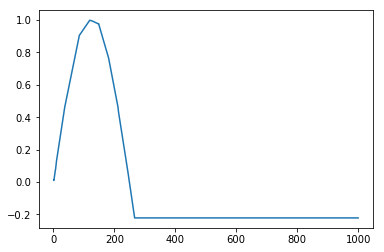

121
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.186866


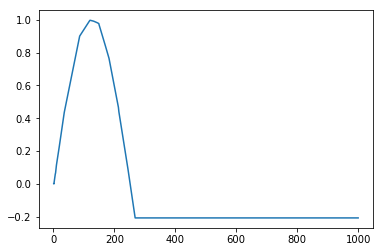

122
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.140102


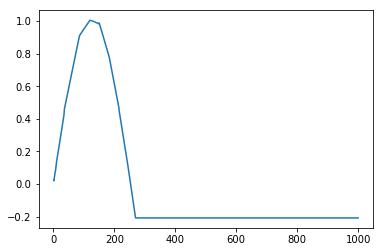

123
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.202699


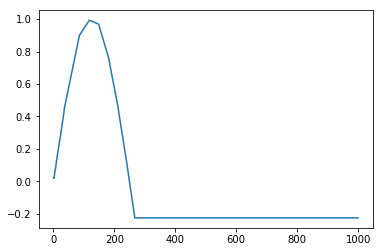

124
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.188826


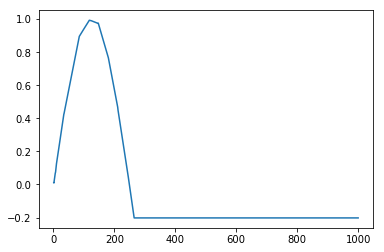

125
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.240778


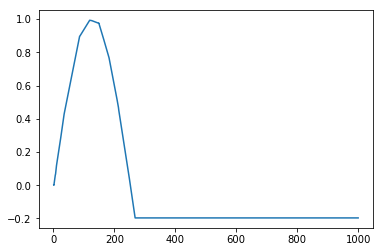

126
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.223222


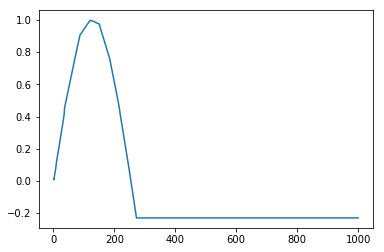

127
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.107300


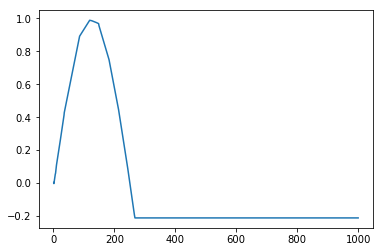

128
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.136691


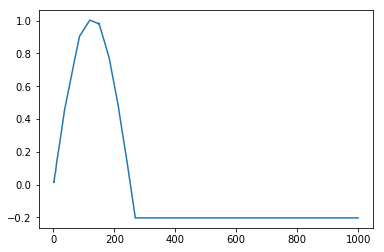

129
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.158979


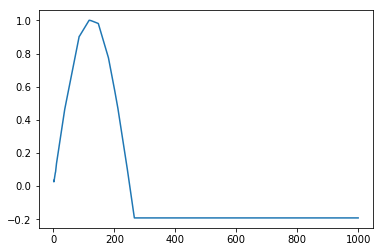

130
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.189179


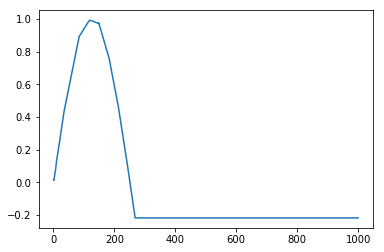

131
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.254002


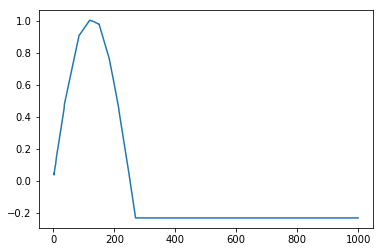

132
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.169635


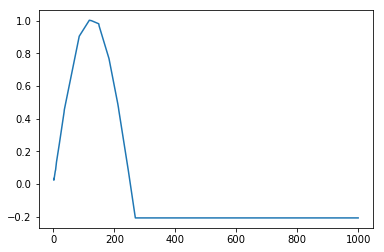

133
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.240947


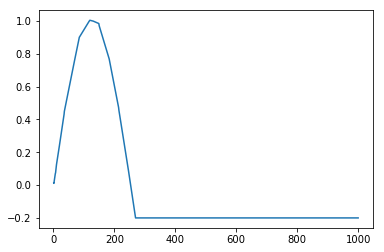

134
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.168162


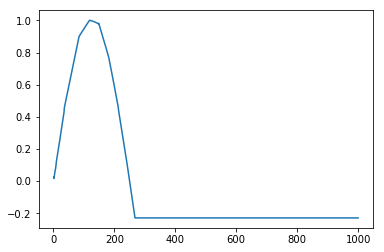

135
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.140664


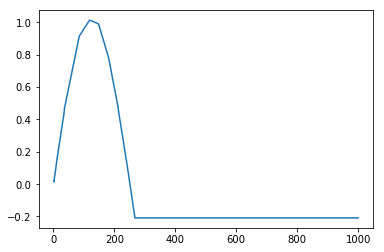

136
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.190096


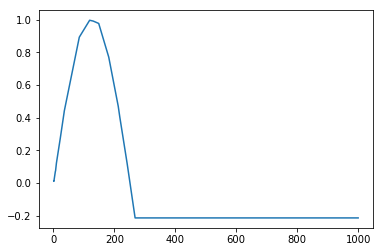

137
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.173425


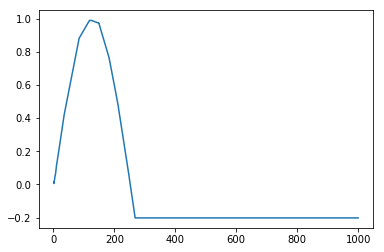

138
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.263794


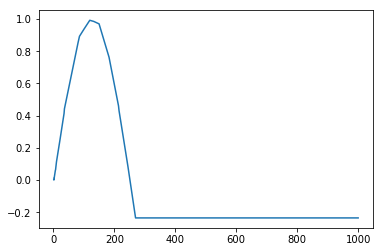

139
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.190202


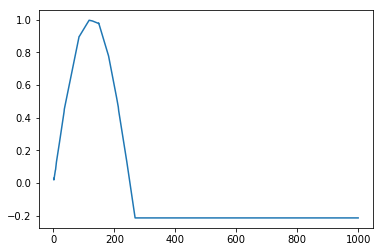

140
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.123596


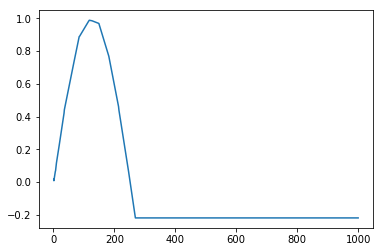

141
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.200501


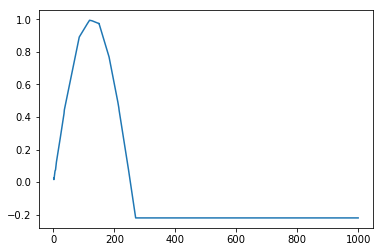

142
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.231454


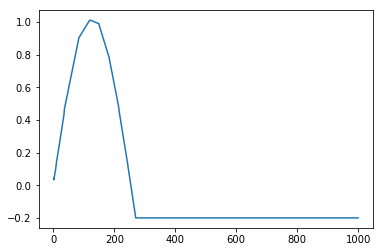

143
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.168400


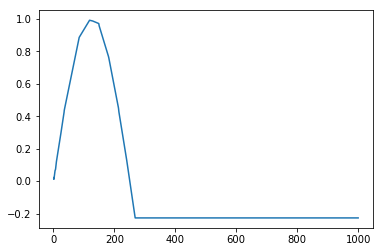

144
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.166757


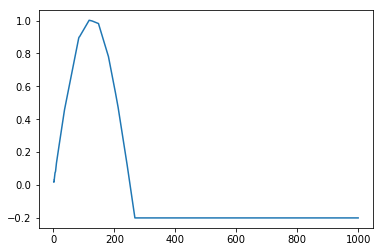

145
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.197489


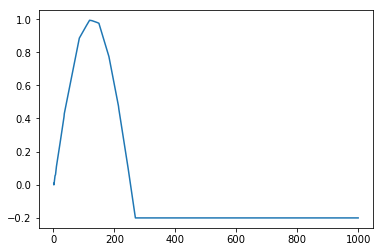

146
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.192327


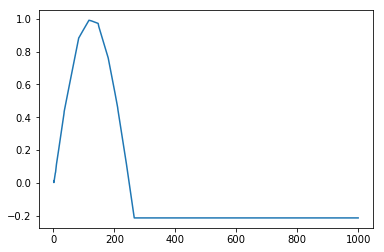

147
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.156585


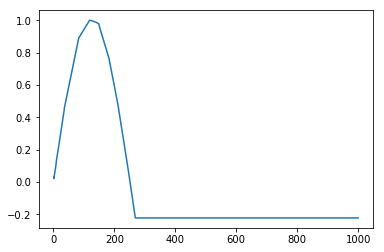

148
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.162729


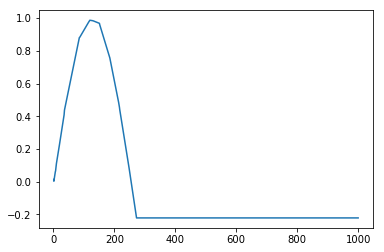

149
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.120593


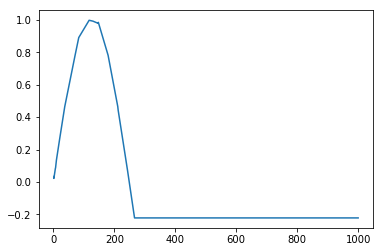

150
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.210736


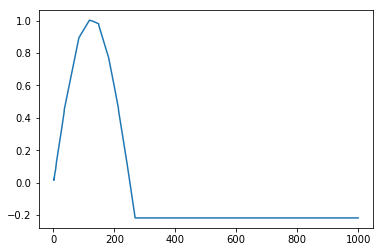

151
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.184665


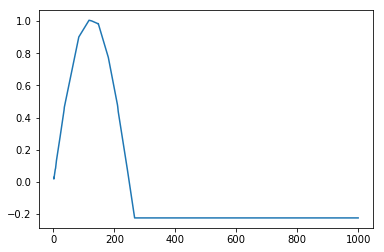

152
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.221233


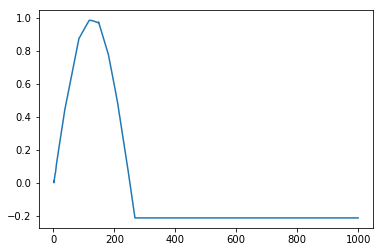

153
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.203389


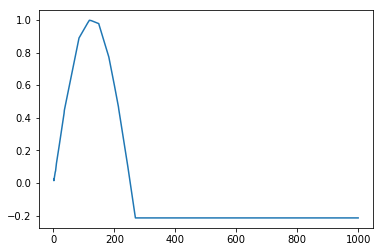

154
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.161008


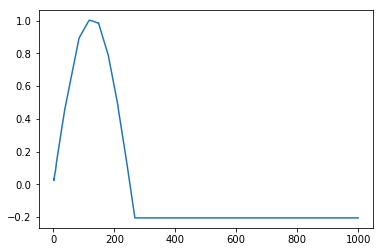

155
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.196850


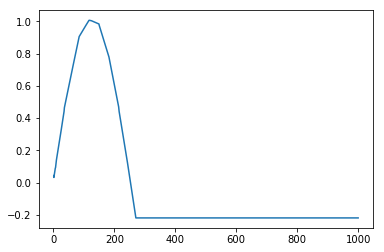

156
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.192281


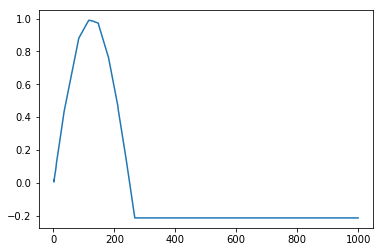

157
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.204069


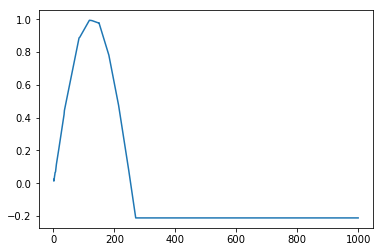

158
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.227907


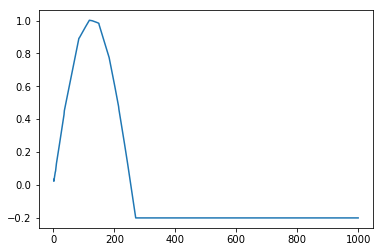

159
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.163299


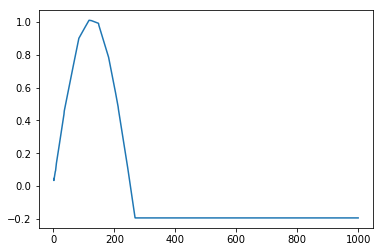

160
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.174658


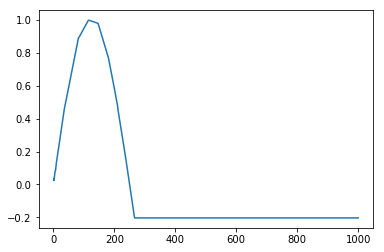

161
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.266724


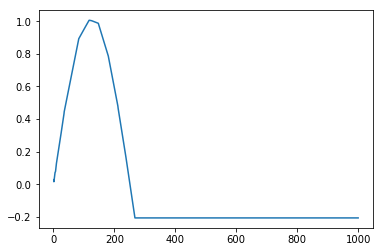

162
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.121010


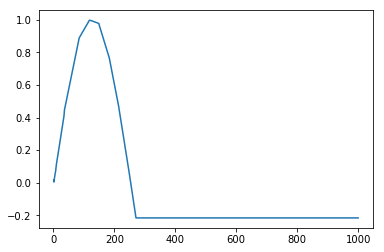

163
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.134934


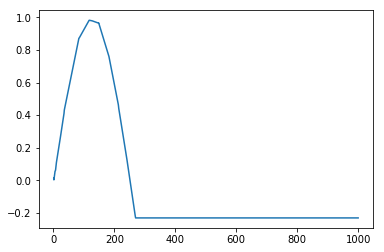

164
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.194717


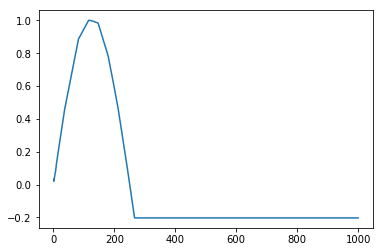

165
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.243715


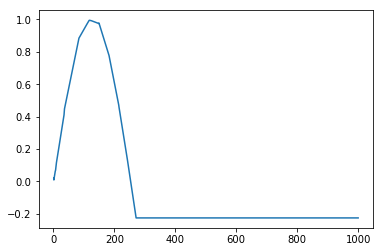

166
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.149936


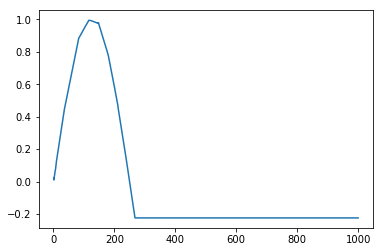

167
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.202672


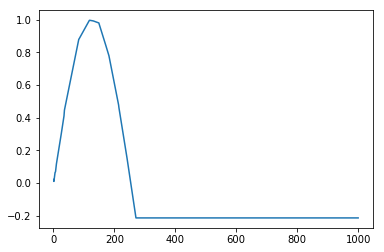

168
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.157686


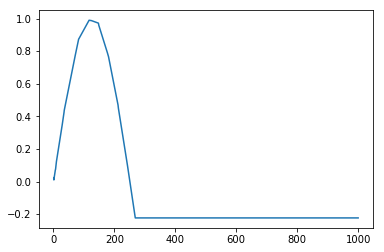

169
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.163324


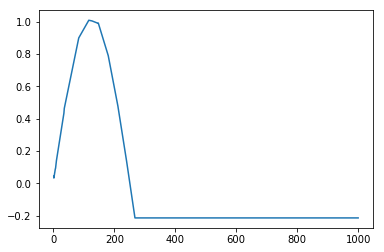

170
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.144966


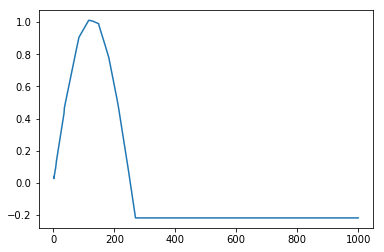

171
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.274961


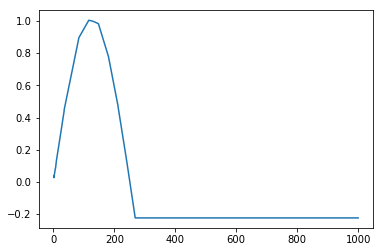

172
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■▶]100.00%  loss = 0.155929


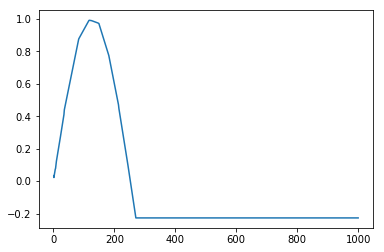

173


In [ ]:
# progress_bar = ProgressBar(3000)
for epoch in range(300):
    if epoch > 200:
        lr = 1e-5
    elif epoch >100:
        lr = 1e-4
    else:
        lr = 1e-3
    for param_group in optimizer.param_groups:
        param_group["lr"] = lr
    model_train(model,train_loader,optimizer)
    
    model.eval()
    inpt = torch.Tensor(x).cuda()
    predict = model(inpt).data.cpu().numpy()
    plt.plot(x,predict)
    plt.show()
    print(epoch)
#     progress_bar.update(i,epoch)

In [ ]:
inpt = torch.Tensor(x).cuda()
predict = model(inpt).data.cpu().numpy()

In [ ]:
print(x.shape,predict.shape)
plt.plot(x,predict)
# plt.plot(x,y)